In [1]:
import graphviz 
import os
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import tree

import utils

from utils import local_data
from utils import window
from utils import Scale, give_error

from utils import location_station, find_set_sunrise, find_set_sunset

%matplotlib inline
warnings.filterwarnings('ignore')

latter_size = 14
plt.rcParams['legend.fontsize'] = latter_size 
plt.rcParams['font.size'] = latter_size 
plt.rcParams['axes.labelsize'] = latter_size
plt.rcParams['xtick.labelsize'] = latter_size
plt.rcParams['ytick.labelsize'] = latter_size

In [2]:
df = pd.read_pickle('./data/sj2_analise.pkl')

In [3]:
df.head()

,vtec,vtec_dt,vtec_dt2,gvtec1,gvtec1_dt,gvtec2,gvtec2_dt,s4
2013-12-01 03:30:00,33.624428,-0.428246,-0.020502,-3.216613,0.002355,1.826065,1.991653,0.163334
2013-12-01 03:40:00,33.205025,-0.546589,-0.118343,-3.122300,0.130198,4.588494,2.530373,0.165397
2013-12-01 03:50:00,32.539631,-0.772594,-0.226005,-2.810556,0.280756,7.786990,2.862830,0.168683
2013-12-01 04:00:00,31.469337,-1.082859,-0.310265,-2.320938,0.399753,10.972091,2.894375,0.173552
2013-12-01 04:10:00,29.995466,-1.429647,-0.346788,-1.764129,0.443303,13.734955,2.621609,0.178917


# Árvore de Regressão
## Completa

In [4]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00253646 -0.00197144 -0.00214602 -0.00230537 -0.00137214 -0.00198839
 -0.0022841  -0.00175466 -0.00183094 -0.00206607] 

O erro quadrático médio foi: 0.001693
O erro quadrático total foi: 2.469120
O maior erro por previsão foi: 0.366354
O erro relativo foi: 8.437308%
O número de verdadeiros negativos foi: 3081
O número de verdadeiros positivos foi: 247
O número de falsos negativos foi: 130
O número de falsos positivos foi: 142
O POD foi: 0.655172
O FAR foi: 0.365039
A ACC foi: 0.924444
O kappa foi: 0.033611

Error for the time series sample:
O erro quadrático médio foi: 0.008295
O erro quadrático total foi: 2.366263
O maior erro por previsão foi: 0.598193
O erro relativo foi: 17.678428%
O número de verdadeiros negativos foi: 525
O número de verdadeiros positivos foi: 47
O número de falsos negativos foi: 37
O número de falsos positivos foi: 66
O POD foi: 0.559524
O FAR foi: 0.584071
A ACC foi: 0.847407
O kappa foi: 0.049442


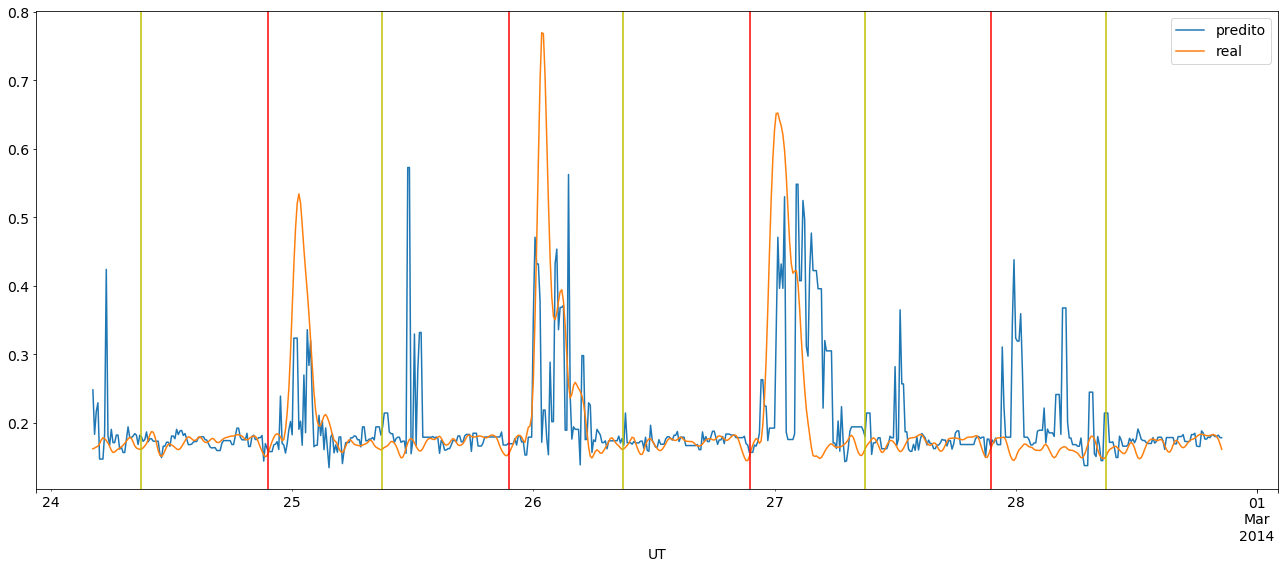

In [5]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predito'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predito'].values);

# plot the time series predict against the real values
ax = df_aux.plot(figsize=(18, 8));
plt.xlabel('UT')

lat, long = location_station('sj2')
set_of_sunrise = find_set_sunrise(df_aux, lat, long)
set_of_sunset = find_set_sunset(df_aux, lat, long)
for i in set_of_sunrise:
    ax.axvline(x=i, color='y')
for i in set_of_sunset[0:-1]:
    ax.axvline(x=i, color='r')

plt.tight_layout()
plt.savefig('./images/regression_cart.eps', format='eps', dpi=1000)

## Sem vtec

In [6]:
instances_set = ['vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00219965 -0.00299462 -0.00270172 -0.00273674 -0.00340863 -0.00245764
 -0.00257208 -0.00218555 -0.00282552 -0.00257985] 

O erro quadrático médio foi: 0.002242
O erro quadrático total foi: 2.840922
O maior erro por previsão foi: 0.359117
O erro relativo foi: 10.684737%
O número de verdadeiros negativos foi: 3013
O número de verdadeiros positivos foi: 188
O número de falsos negativos foi: 189
O número de falsos positivos foi: 210
O POD foi: 0.498674
O FAR foi: 0.527638
A ACC foi: 0.889167
O kappa foi: 0.046986

Error for the time series sample:
O erro quadrático médio foi: 0.007765
O erro quadrático total foi: 2.289466
O maior erro por previsão foi: 0.626911
O erro relativo foi: 19.608673%
O número de verdadeiros negativos foi: 517
O número de verdadeiros positivos foi: 50
O número de falsos negativos foi: 34
O número de falsos positivos foi: 74
O POD foi: 0.595238
O FAR foi: 0.596774
A ACC foi: 0.840000
O kappa foi: 0.046701


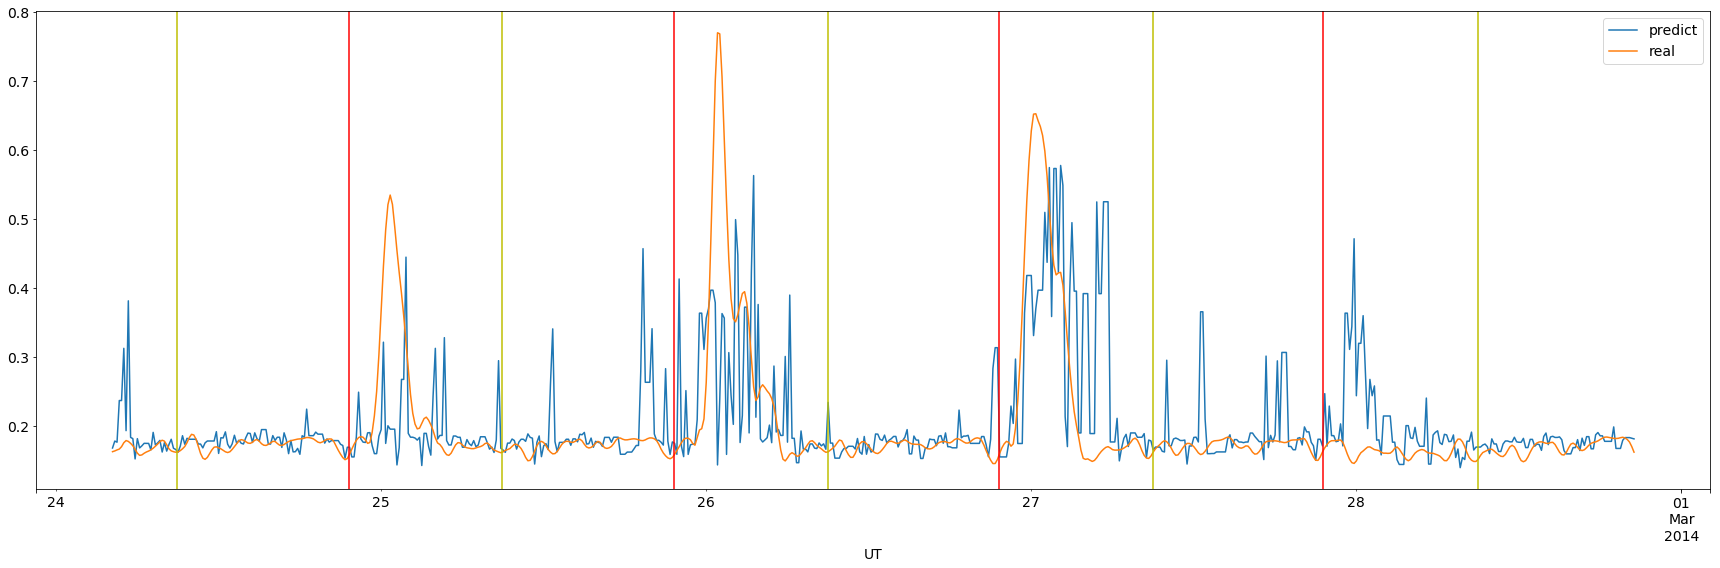

In [7]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
ax = df_aux.plot(figsize=(24, 8));
plt.xlabel('UT')

lat, long = location_station('sj2')
set_of_sunrise = find_set_sunrise(df_aux, lat, long)
set_of_sunset = find_set_sunset(df_aux, lat, long)
for i in set_of_sunrise:
    ax.axvline(x=i, color='y')
for i in set_of_sunset[0:-1]:
    ax.axvline(x=i, color='r')

plt.tight_layout()

## Sem derivada temporal primeira do VTEC

In [8]:
instances_set = ['vtec', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00261576 -0.00219493 -0.00211403 -0.00203257 -0.00170078 -0.00182305
 -0.0024639  -0.00161264 -0.00199002 -0.00197626] 

O erro quadrático médio foi: 0.001762
O erro quadrático total foi: 2.518354
O maior erro por previsão foi: 0.364188
O erro relativo foi: 8.994189%
O número de verdadeiros negativos foi: 3066
O número de verdadeiros positivos foi: 226
O número de falsos negativos foi: 151
O número de falsos positivos foi: 157
O POD foi: 0.599469
O FAR foi: 0.409922
A ACC foi: 0.914444
O kappa foi: 0.038460

Error for the time series sample:
O erro quadrático médio foi: 0.005832
O erro quadrático total foi: 1.984036
O maior erro por previsão foi: 0.435121
O erro relativo foi: 14.721451%
O número de verdadeiros negativos foi: 553
O número de verdadeiros positivos foi: 52
O número de falsos negativos foi: 32
O número de falsos positivos foi: 38
O POD foi: 0.619048
O FAR foi: 0.422222
A ACC foi: 0.896296
O kappa foi: 0.043176


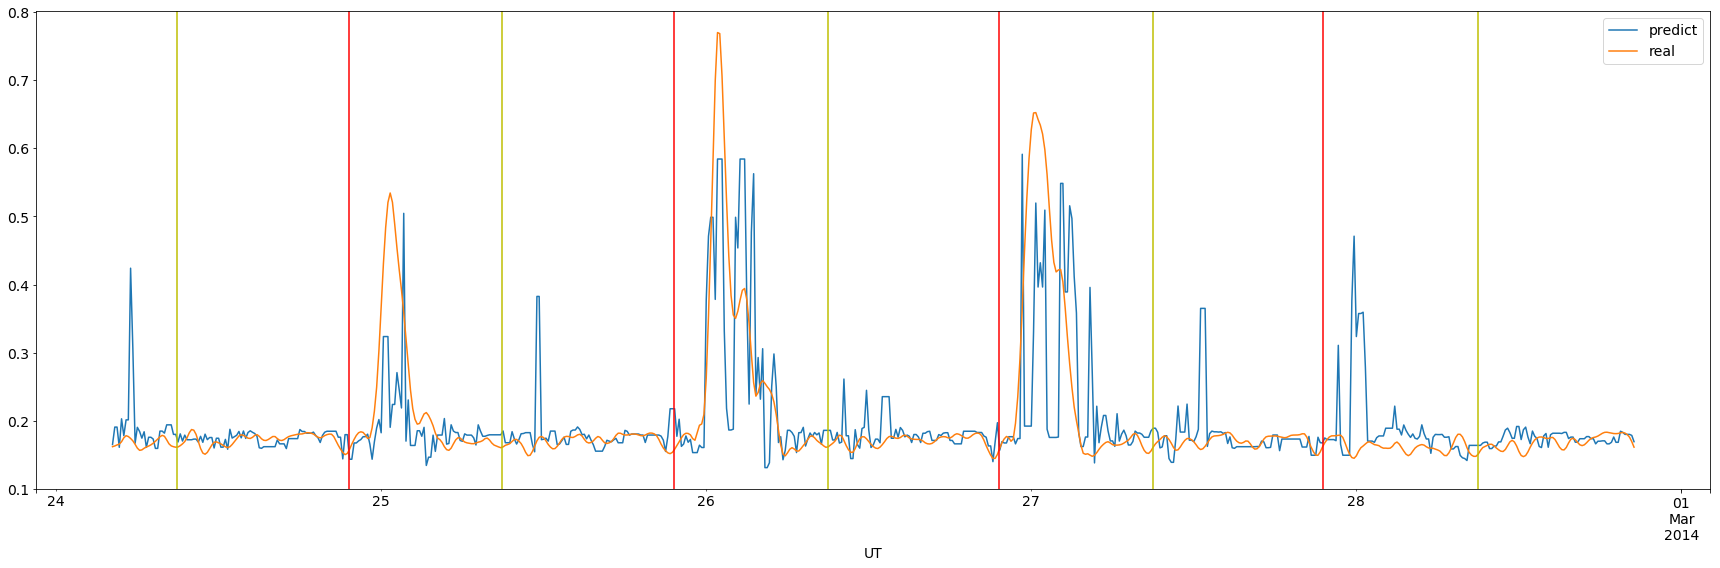

In [9]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
ax = df_aux.plot(figsize=(24, 8));
plt.xlabel('UT')

lat, long = location_station('sj2')
set_of_sunrise = find_set_sunrise(df_aux, lat, long)
set_of_sunset = find_set_sunset(df_aux, lat, long)
for i in set_of_sunrise:
    ax.axvline(x=i, color='y')
for i in set_of_sunset[0:-1]:
    ax.axvline(x=i, color='r')

plt.tight_layout()

## Sem derivada temporal segunda do VTEC

In [10]:
instances_set = ['vtec', 'vtec_dt', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00268534 -0.00163704 -0.00188549 -0.00281568 -0.00185592 -0.0017455
 -0.00191197 -0.0017875  -0.00184953 -0.00195677] 

O erro quadrático médio foi: 0.001845
O erro quadrático total foi: 2.577284
O maior erro por previsão foi: 0.387299
O erro relativo foi: 8.563658%
O número de verdadeiros negativos foi: 3070
O número de verdadeiros positivos foi: 231
O número de falsos negativos foi: 146
O número de falsos positivos foi: 153
O POD foi: 0.612732
O FAR foi: 0.398438
A ACC foi: 0.916944
O kappa foi: 0.037312

Error for the time series sample:
O erro quadrático médio foi: 0.006885
O erro quadrático total foi: 2.155832
O maior erro por previsão foi: 0.510913
O erro relativo foi: 16.800809%
O número de verdadeiros negativos foi: 538
O número de verdadeiros positivos foi: 59
O número de falsos negativos foi: 25
O número de falsos positivos foi: 53
O POD foi: 0.702381
O FAR foi: 0.473214
A ACC foi: 0.884444
O kappa foi: 0.036383


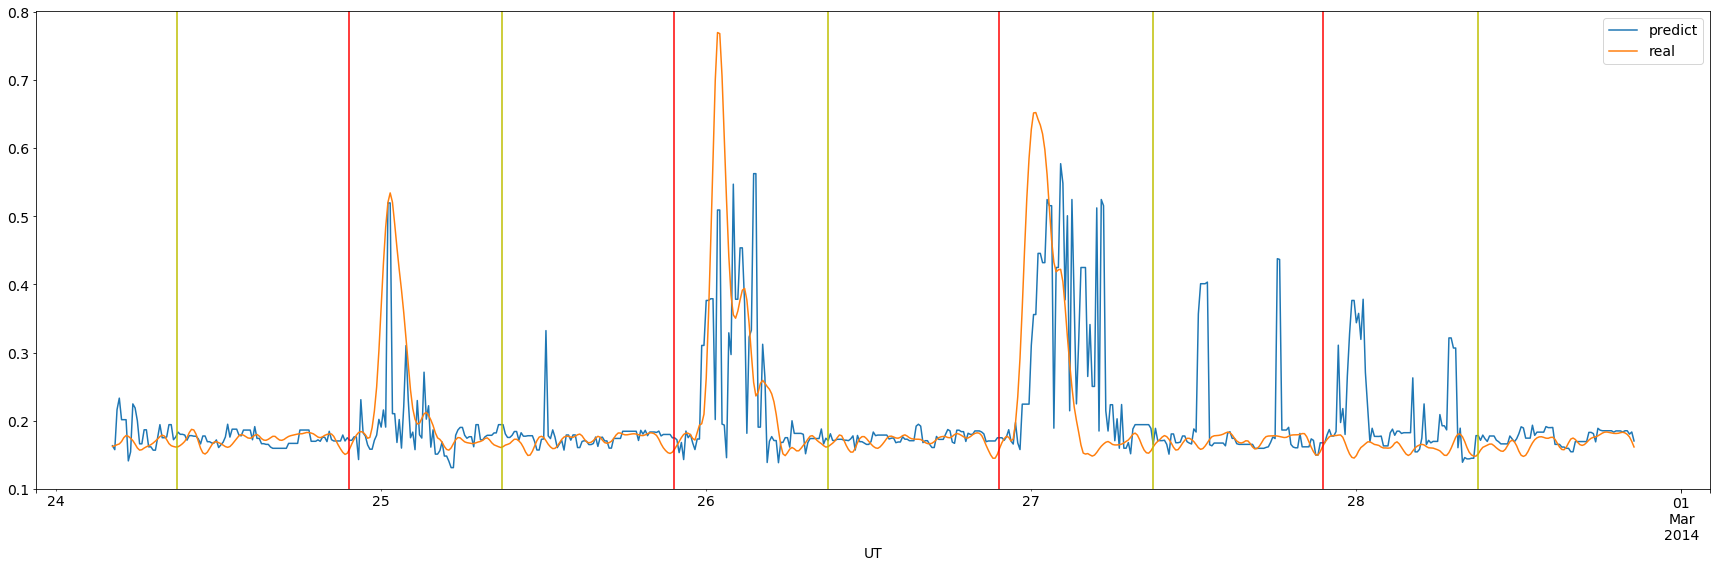

In [11]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
ax = df_aux.plot(figsize=(24, 8));
plt.xlabel('UT')

lat, long = location_station('sj2')
set_of_sunrise = find_set_sunrise(df_aux, lat, long)
set_of_sunset = find_set_sunset(df_aux, lat, long)
for i in set_of_sunrise:
    ax.axvline(x=i, color='y')
for i in set_of_sunset[0:-1]:
    ax.axvline(x=i, color='r')

plt.tight_layout()

## Sem gradiente do VTEC em relação à Pirassununga

In [12]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00274544 -0.00207004 -0.0024342  -0.00247315 -0.00222711 -0.00258935
 -0.00184306 -0.00218736 -0.0022083  -0.00220059] 

O erro quadrático médio foi: 0.002031
O erro quadrático total foi: 2.704301
O maior erro por previsão foi: 0.414523
O erro relativo foi: 9.220319%
O número de verdadeiros negativos foi: 3072
O número de verdadeiros positivos foi: 212
O número de falsos negativos foi: 165
O número de falsos positivos foi: 151
O POD foi: 0.562334
O FAR foi: 0.415978
A ACC foi: 0.912222
O kappa foi: 0.041581

Error for the time series sample:
O erro quadrático médio foi: 0.007977
O erro quadrático total foi: 2.320500
O maior erro por previsão foi: 0.531597
O erro relativo foi: 16.837821%
O número de verdadeiros negativos foi: 544
O número de verdadeiros positivos foi: 39
O número de falsos negativos foi: 45
O número de falsos positivos foi: 47
O POD foi: 0.464286
O FAR foi: 0.546512
A ACC foi: 0.863704
O kappa foi: 0.057751


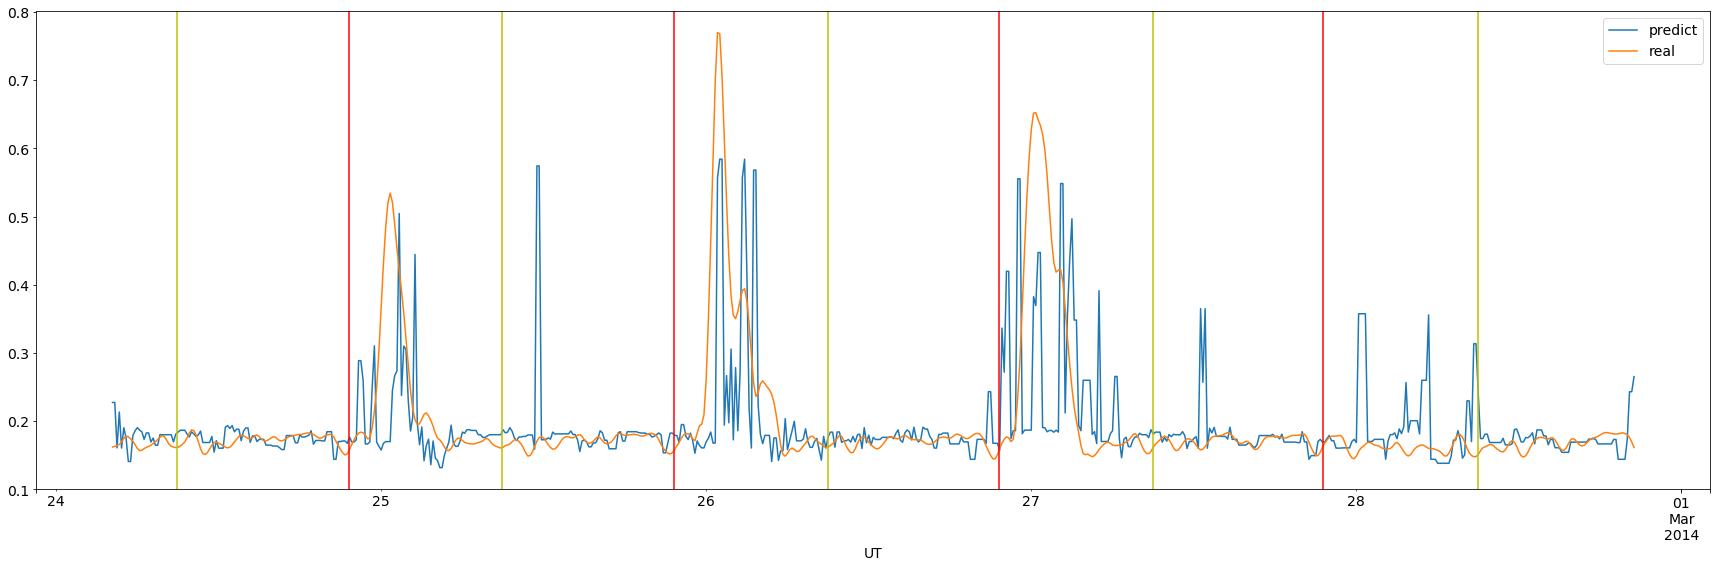

In [13]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
ax = df_aux.plot(figsize=(24, 8));
plt.xlabel('UT')

lat, long = location_station('sj2')
set_of_sunrise = find_set_sunrise(df_aux, lat, long)
set_of_sunset = find_set_sunset(df_aux, lat, long)
for i in set_of_sunrise:
    ax.axvline(x=i, color='y')
for i in set_of_sunset[0:-1]:
    ax.axvline(x=i, color='r')

plt.tight_layout()

## Sem derivada temporal do gradiente do VTEC em relação à Pirassununga

In [14]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00181906 -0.00164328 -0.00193978 -0.00237963 -0.00231989 -0.00222113
 -0.00235776 -0.00159653 -0.00216732 -0.00182171] 

O erro quadrático médio foi: 0.001964
O erro quadrático total foi: 2.659094
O maior erro por previsão foi: 0.385034
O erro relativo foi: 8.894230%
O número de verdadeiros negativos foi: 3083
O número de verdadeiros positivos foi: 247
O número de falsos negativos foi: 130
O número de falsos positivos foi: 140
O POD foi: 0.655172
O FAR foi: 0.361757
A ACC foi: 0.925000
O kappa foi: 0.033593

Error for the time series sample:
O erro quadrático médio foi: 0.007809
O erro quadrático total foi: 2.295844
O maior erro por previsão foi: 0.594008
O erro relativo foi: 15.796020%
O número de verdadeiros negativos foi: 539
O número de verdadeiros positivos foi: 44
O número de falsos negativos foi: 40
O número de falsos positivos foi: 52
O POD foi: 0.523810
O FAR foi: 0.541667
A ACC foi: 0.863704
O kappa foi: 0.052341


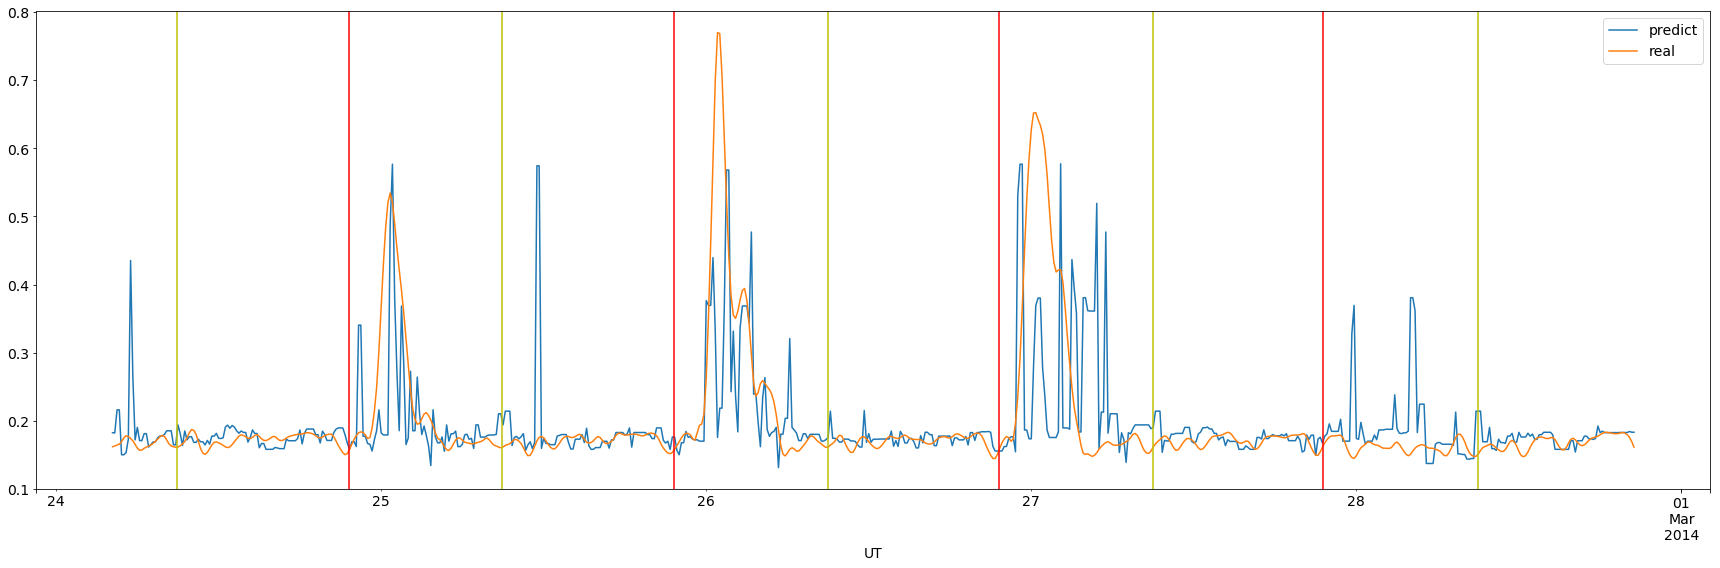

In [15]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
ax = df_aux.plot(figsize=(24, 8));
plt.xlabel('UT')

lat, long = location_station('sj2')
set_of_sunrise = find_set_sunrise(df_aux, lat, long)
set_of_sunset = find_set_sunset(df_aux, lat, long)
for i in set_of_sunrise:
    ax.axvline(x=i, color='y')
for i in set_of_sunset[0:-1]:
    ax.axvline(x=i, color='r')

plt.tight_layout()

## Sem gradiente do VTEC em relação à Brasília

In [16]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00216574 -0.00189507 -0.00193247 -0.00295557 -0.0023235  -0.00332144
 -0.0029157  -0.00210203 -0.00244719 -0.00272653] 

O erro quadrático médio foi: 0.002205
O erro quadrático total foi: 2.817729
O maior erro por previsão foi: 0.393690
O erro relativo foi: 9.987470%
O número de verdadeiros negativos foi: 3026
O número de verdadeiros positivos foi: 218
O número de falsos negativos foi: 159
O número de falsos positivos foi: 197
O POD foi: 0.578249
O FAR foi: 0.474699
A ACC foi: 0.901111
O kappa foi: 0.040438

Error for the time series sample:
O erro quadrático médio foi: 0.008647
O erro quadrático total foi: 2.415952
O maior erro por previsão foi: 0.612082
O erro relativo foi: 18.563624%
O número de verdadeiros negativos foi: 524
O número de verdadeiros positivos foi: 46
O número de falsos negativos foi: 38
O número de falsos positivos foi: 67
O POD foi: 0.547619
O FAR foi: 0.592920
A ACC foi: 0.844444
O kappa foi: 0.050467


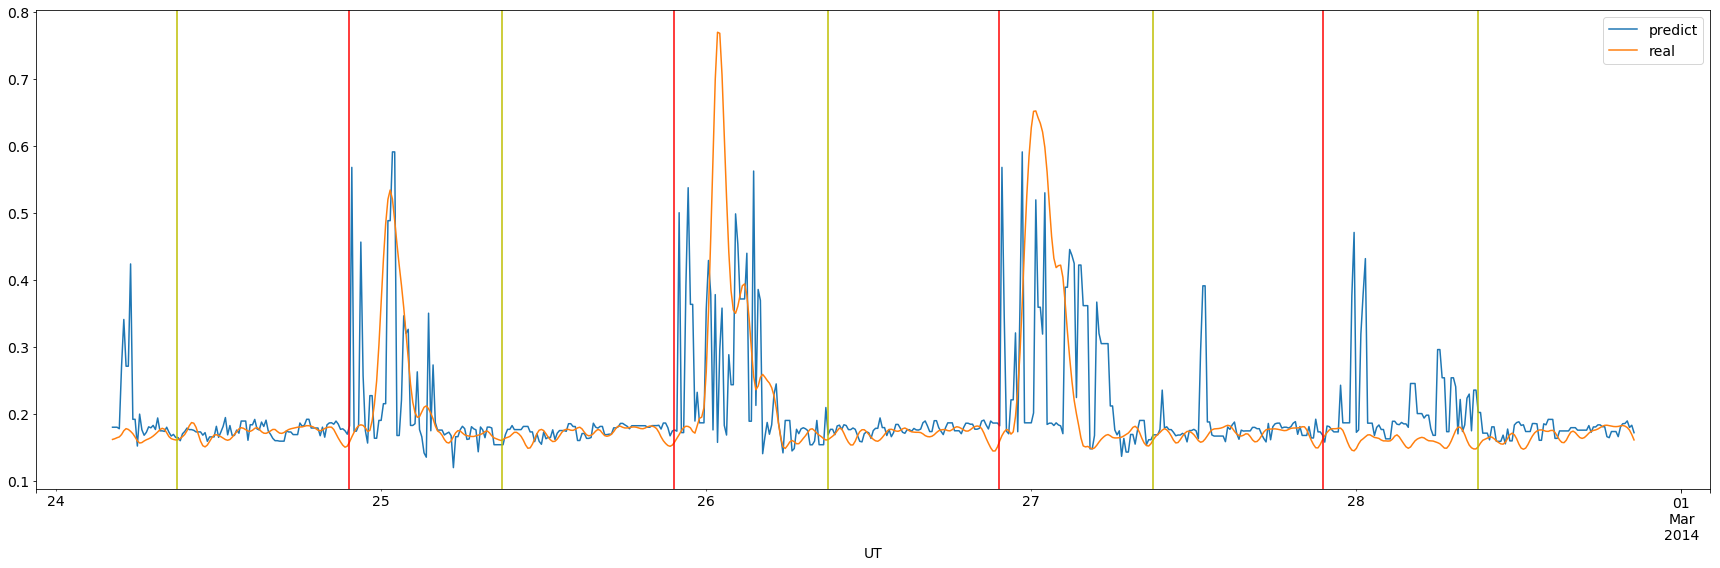

In [17]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
ax = df_aux.plot(figsize=(24, 8));
plt.xlabel('UT')

lat, long = location_station('sj2')
set_of_sunrise = find_set_sunrise(df_aux, lat, long)
set_of_sunset = find_set_sunset(df_aux, lat, long)
for i in set_of_sunrise:
    ax.axvline(x=i, color='y')
for i in set_of_sunset[0:-1]:
    ax.axvline(x=i, color='r')

plt.tight_layout()

## Sem derivada temporal do gradiente do VTEC em relação à Brasília

In [18]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00208308 -0.00139587 -0.00256296 -0.00203103 -0.00175163 -0.00217408
 -0.00198695 -0.00185811 -0.00185532 -0.00192548] 

O erro quadrático médio foi: 0.001886
O erro quadrático total foi: 2.605601
O maior erro por previsão foi: 0.393421
O erro relativo foi: 8.780357%
O número de verdadeiros negativos foi: 3070
O número de verdadeiros positivos foi: 225
O número de falsos negativos foi: 152
O número de falsos positivos foi: 153
O POD foi: 0.596817
O FAR foi: 0.404762
A ACC foi: 0.915278
O kappa foi: 0.038662

Error for the time series sample:
O erro quadrático médio foi: 0.008375
O erro quadrático total foi: 2.377646
O maior erro por previsão foi: 0.594008
O erro relativo foi: 16.912126%
O número de verdadeiros negativos foi: 539
O número de verdadeiros positivos foi: 55
O número de falsos negativos foi: 29
O número de falsos positivos foi: 52
O POD foi: 0.654762
O FAR foi: 0.485981
A ACC foi: 0.880000
O kappa foi: 0.040584


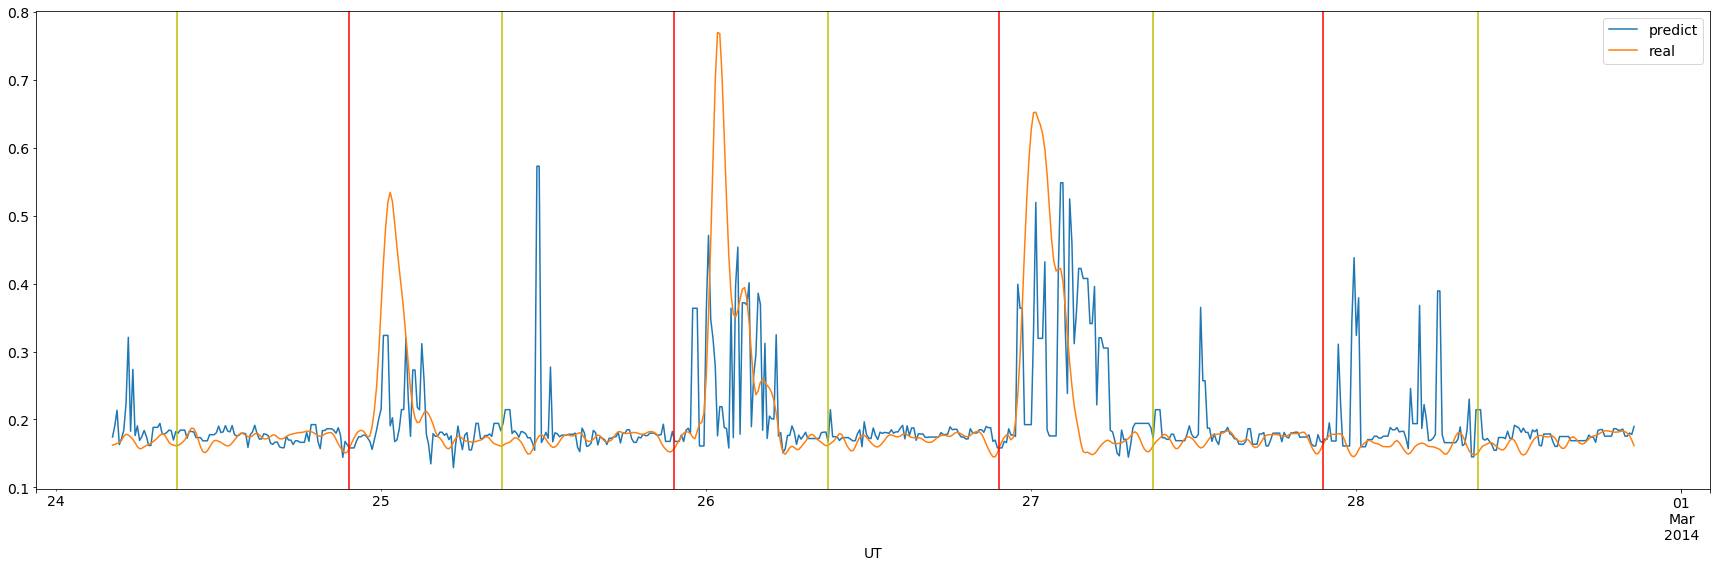

In [19]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
ax = df_aux.plot(figsize=(24, 8));
plt.xlabel('UT')

lat, long = location_station('sj2')
set_of_sunrise = find_set_sunrise(df_aux, lat, long)
set_of_sunset = find_set_sunset(df_aux, lat, long)
for i in set_of_sunrise:
    ax.axvline(x=i, color='y')
for i in set_of_sunset[0:-1]:
    ax.axvline(x=i, color='r')

plt.tight_layout()